[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/jayunruh/python_introDS_course/blob/master/intro_to_python05_plotting.ipynb)

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

## Loading the dataframe

In [41]:
df = pd.read_csv('https://www.dropbox.com/s/ir6bka4nrysnrge/PlanariaUpdated.csv?dl=1')

# Groupby and agg

Groupby together with apply allows you to aggregate data, much the same as you would in an excel pivot table but with a lot more flexibility.

Groupby by itself does not do anything other than internally change the way that the data is accessed. It is only when you apply a function to the grouped data that you get a result.

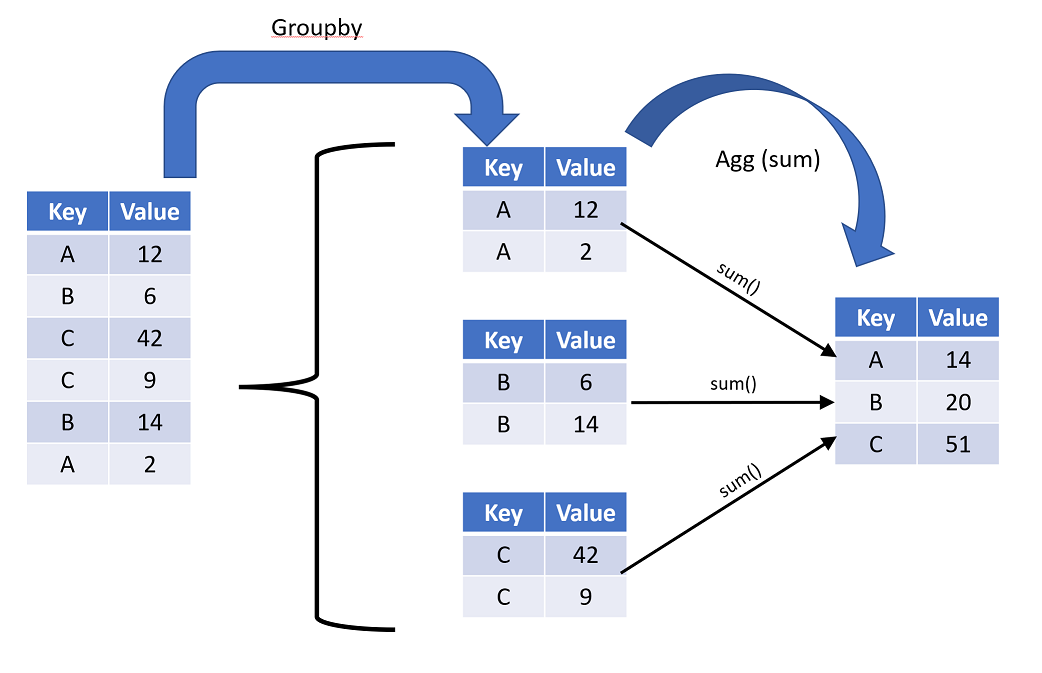


In [42]:
agged_df = df.groupby(['Primary name']).agg(len)
agged_df

,Unnamed: 0,File,Area,TUNEL,H3p,Batch,Plate,Well,Object,Slide No.,secondary name,RNAi,Time
Primary name,,,,,,,,,,,,,
Agat-1 RNAi 2dpa,20,20,20,20,20,20,20,20,20,20,20,20,20
Agat-1 RNAi 4dpa,17,17,17,17,17,17,17,17,17,17,17,17,17
Agat-1 RNAi 10dpf,10,10,10,10,10,10,10,10,10,10,10,10,10
Agat-1 RNAi 5dpf,10,10,10,10,10,10,10,10,10,10,10,10,10
Agat-1 RNAi 6hpa,20,20,20,20,20,20,20,20,20,20,20,20,20
Agat-1 RNAi 7dpf,10,10,10,10,10,10,10,10,10,10,10,10,10
Agat-2 RNAi 2dpa,19,19,19,19,19,19,19,19,19,19,19,19,19
Agat-2 RNAi 4dpa,18,18,18,18,18,18,18,18,18,18,18,18,18
Agat-2 RNAi 10dpf,10,10,10,10,10,10,10,10,10,10,10,10,10


What did this do?  It went through our dataframe, and found all the unique values in 'Primary name', and then for each of those unique values it created a new dataframe with only the rows that had that value in 'Primary name'.  It then applied the function "len" to that new dataframe, and returned the result.  Len tells us how many image files correspond to each Primary name, but that is not very useful, we actually want the median value for TUNEL and H3p, but this is useful as it tells us how many worm images are associated with each Primary name.

The agg() function can take a dictionary, where the keys are column names and the values are functions to apply to those columns.  We can use this to get the median value for each column.

In [43]:
agged_df = df.groupby(['Primary name']).agg({'TUNEL':np.median, 'H3p':np.median}).reset_index()
agged_df

C:\Users\smc\AppData\Local\Temp\ipykernel_33092\1382510874.py:1: FutureWarning:

The provided callable <function median at 0x000001E07E2D1EE0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.

C:\Users\smc\AppData\Local\Temp\ipykernel_33092\1382510874.py:1: FutureWarning:

The provided callable <function median at 0x000001E07E2D1EE0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.



,Primary name,TUNEL,H3p
0,Agat-1 RNAi 2dpa,318.490224,514.554913
1,Agat-1 RNAi 4dpa,598.407492,436.325516
2,Agat-1 RNAi 10dpf,235.670511,218.239248
3,Agat-1 RNAi 5dpf,447.672115,273.950983
4,Agat-1 RNAi 6hpa,180.772034,287.642109
5,Agat-1 RNAi 7dpf,244.173856,240.812105
6,Agat-2 RNAi 2dpa,357.519229,206.363454
7,Agat-2 RNAi 4dpa,904.654898,288.142694
8,Agat-2 RNAi 10dpf,326.926954,165.742438
9,Agat-2 RNAi 5dpf,258.415644,205.407307


Whenever a groupby/agg operation is used, we almost always tack .reset_index() onto the end so that pandas does not make stupid multi-level column names.

This is not as much use as what we really want for this experiment:  broken down by treatment, and then by timepoint.  We can do this by passing a list of column names to groupby:

In [44]:
agged_df = df.groupby(['RNAi', 'Time']).agg({'TUNEL':np.median, 'H3p':np.median}).reset_index()
agged_df

C:\Users\smc\AppData\Local\Temp\ipykernel_33092\3774966961.py:1: FutureWarning:

The provided callable <function median at 0x000001E07E2D1EE0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.

C:\Users\smc\AppData\Local\Temp\ipykernel_33092\3774966961.py:1: FutureWarning:

The provided callable <function median at 0x000001E07E2D1EE0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.



,RNAi,Time,TUNEL,H3p
0,Agat-1,10dpf,235.670511,218.239248
1,Agat-1,2dpa,318.490224,514.554913
2,Agat-1,4dpa,598.407492,436.325516
3,Agat-1,5dpf,447.672115,273.950983
4,Agat-1,6hpa,180.772034,287.642109
5,Agat-1,7dpf,244.173856,240.812105
6,Agat-2,10dpf,326.926954,165.742438
7,Agat-2,2dpa,357.519229,206.363454
8,Agat-2,4dpa,904.654898,288.142694
9,Agat-2,5dpf,258.415644,205.407307


# Simple plotting of results using seaborn

Now that we have the data aggregated, let's focus on just one time point:  5 days post feeding

<Axes: xlabel='RNAi', ylabel='TUNEL'>

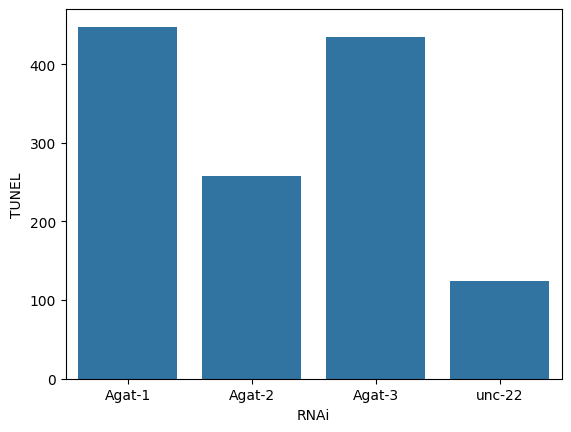

In [45]:
dpf5_df = agged_df[agged_df['Time']=='5dpf']
sns.barplot(data=dpf5_df, x='RNAi', y='TUNEL')

We want the unc-22 to be on the left so we use the order parameter in seaborn plots.

Text(0.5, 1.0, 'Median TUNEL density at 5dpf')

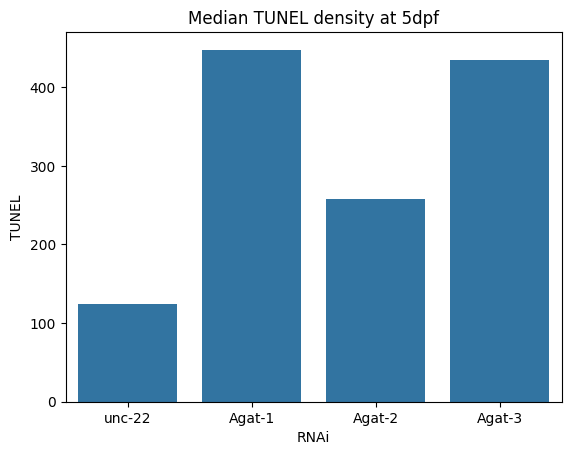

In [46]:
sns.barplot(data=dpf5_df, x='RNAi', y='TUNEL', order=['unc-22', 'Agat-1', 'Agat-2', 'Agat-3'])
plt.title('Median TUNEL density at 5dpf')

But this is just at 5dpf, nothing stops us from plotting all of the time points together, we can use color (hue) in order to distinguish the different time points

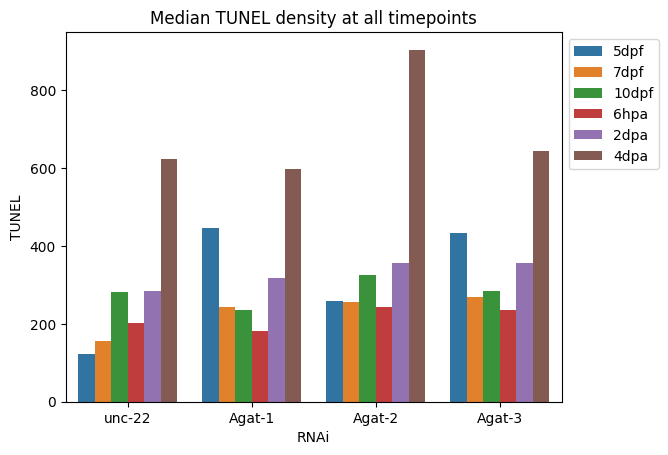

In [47]:
sns.barplot(data=agged_df, x='RNAi', y='TUNEL', order=['unc-22', 'Agat-1', 'Agat-2', 'Agat-3'], hue='Time', hue_order=['5dpf', '7dpf', '10dpf', '6hpa', '2dpa', '4dpa'])
plt.title('Median TUNEL density at all timepoints')
plt.legend(bbox_to_anchor=(1,1))

# Statistical plots in seaborn

The REAL beauty of seaborn and plotly is that we can even take a step further back, and include ALL of the original data points in statistical plots, we did not really even need to aggregate in this case!

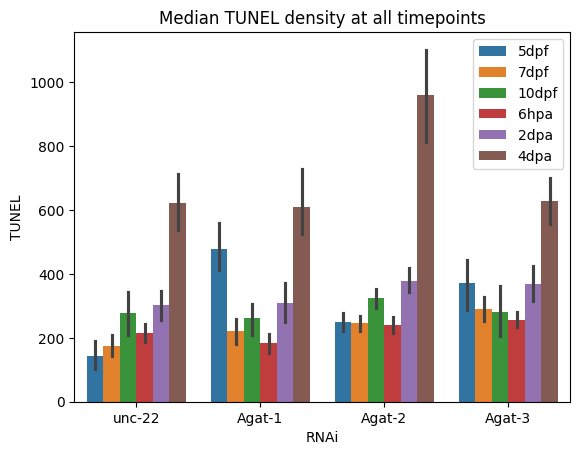

In [48]:
sns.barplot(data=df, x='RNAi', y='TUNEL', order=['unc-22', 'Agat-1', 'Agat-2', 'Agat-3'], hue='Time', hue_order=['5dpf', '7dpf', '10dpf', '6hpa', '2dpa', '4dpa'])
plt.title('Median TUNEL density at all timepoints')
plt.legend(bbox_to_anchor=(1,1))

Seaborn recognizes that there are multiple datapoints in the table that correspond to unc-22, 5dpf, and plots the mean and the 95% confidence interval.  

Alternatively we can do a boxplot.

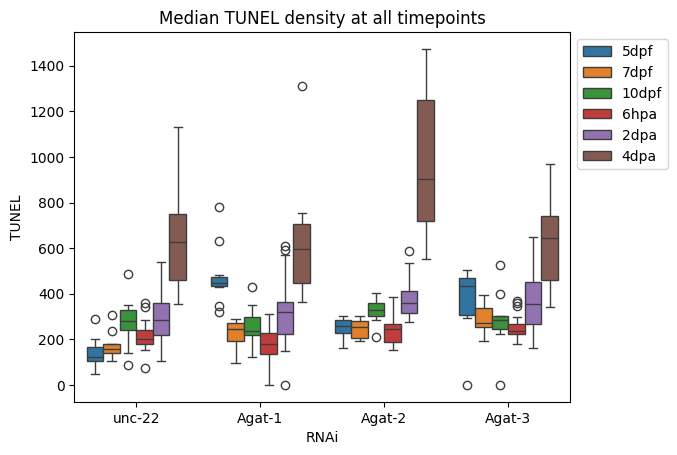

In [49]:
sns.boxplot(data=df, x='RNAi', y='TUNEL', order=['unc-22', 'Agat-1', 'Agat-2', 'Agat-3'], hue='Time', hue_order=['5dpf', '7dpf', '10dpf', '6hpa', '2dpa', '4dpa'])
plt.title('Median TUNEL density at all timepoints')
plt.legend(bbox_to_anchor=(1,1))

Or we can stack two graphs on top of each other: I like using the box and the strip plot

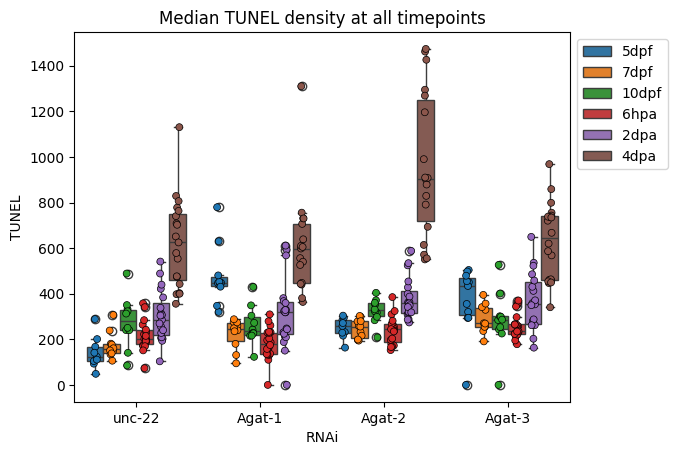

In [50]:
sns.boxplot(data=df, x='RNAi', y='TUNEL', order=['unc-22', 'Agat-1', 'Agat-2', 'Agat-3'], hue='Time', hue_order=['5dpf', '7dpf', '10dpf', '6hpa', '2dpa', '4dpa'])
sns.stripplot(data=df, x='RNAi', y='TUNEL', order=['unc-22', 'Agat-1', 'Agat-2', 'Agat-3'], hue='Time', hue_order=['5dpf', '7dpf', '10dpf', '6hpa', '2dpa', '4dpa'], dodge=True, linewidth=0.5, edgecolor='black', legend=False)
plt.title('Median TUNEL density at all timepoints')
plt.legend(bbox_to_anchor=(1,1))

Seaborn plots play nicely with matplotlib, so you can use them in the same way as you would use matplotlib plots.

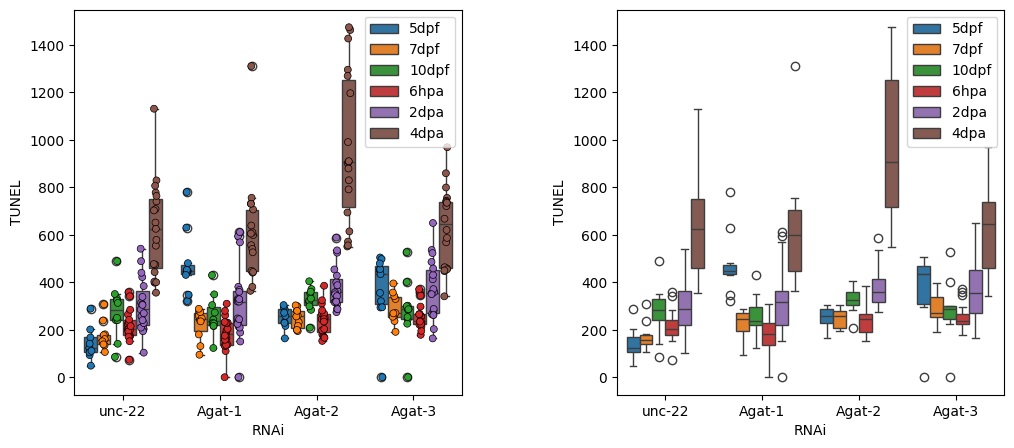

In [51]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'wspace': 0.4})


box = sns.boxplot(data=df, x='RNAi', y='TUNEL', order=['unc-22', 'Agat-1', 'Agat-2', 'Agat-3'], hue='Time', hue_order=['5dpf', '7dpf', '10dpf', '6hpa', '2dpa', '4dpa'], ax=axs[0])
strip = sns.stripplot(data=df, x='RNAi', y='TUNEL', order=['unc-22', 'Agat-1', 'Agat-2', 'Agat-3'], hue='Time', hue_order=['5dpf', '7dpf', '10dpf', '6hpa', '2dpa', '4dpa'], dodge=True, linewidth=0.5, edgecolor='black', ax=axs[0], legend=False)
plt.subplot(1,2,1)
plt.legend(bbox_to_anchor=(1,1))


sns.boxplot(data=df, x='RNAi', y='TUNEL', order=['unc-22', 'Agat-1', 'Agat-2', 'Agat-3'], hue='Time', hue_order=['5dpf', '7dpf', '10dpf', '6hpa', '2dpa', '4dpa'], ax=axs[1])
plt.subplot(1,2,2)
plt.legend(bbox_to_anchor=(1,1))

plt.savefig('TUNEL.pdf', dpi=300)

### ***Exercise:  Your PI hates box plots, they want you to make a violin plot instead.  They also want all of the 5dpfs together, and the 7dpfs together etc.  How would you do this?

Seaborn has a variety of really awesome plotting functions, and they are all very similar in style to these examples in that they take a dataframe as an argument, and you simply provide the columns for the X/Y/Color/Facet etc.  I highly recommend checking out the seaborn gallery for more examples:  https://seaborn.pydata.org/examples/index.html

Sometimes the customizability of seaborn is really necessary for making a figure for a paper, but most of the time I am exploring data, and for that I prefer my favorite plotting package that I almost use exclusively:  plotly.

# Plotly

Switching to a new dataset 20240401

In [52]:
df = pd.read_csv('https://www.dropbox.com/scl/fi/rirfgn0x25m32vtocvben/Lesson5b-B.csv?rlkey=ii8qcd914nbwbyy4u8r58tb1t&dl=1').dropna()

In [53]:
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,File,Area,Density1,Density2,Batch,Plate,Well,Object,PlateWell,Slide Number,Sample,Description1,Food,Time,Time (h)
0,11,232,81,./20240321_140300_322/Plate000_Well2_Object0.t...,3.341158,51.179857,54.172832,20240321_140300_322,0,2,0,000_2,Slide2,Artemina 10min,20296/H3P (FAM/Alexa555),Artemina,10min,0.166667
1,12,233,207,./20240321_140300_322/Plate000_Well2_Object1.t...,3.866314,30.520026,32.847825,20240321_140300_322,0,2,1,000_2,Slide2,Artemina 10min,20296/H3P (FAM/Alexa555),Artemina,10min,0.166667
2,13,236,263,./20240321_140300_322/Plate000_Well2_Object2.t...,3.158134,54.462533,57.628959,20240321_140300_322,0,2,2,000_2,Slide2,Artemina 10min,20296/H3P (FAM/Alexa555),Artemina,10min,0.166667
3,14,234,245,./20240321_140300_322/Plate000_Well2_Object3.t...,2.793080,31.864467,33.296578,20240321_140300_322,0,2,3,000_2,Slide2,Artemina 10min,20296/H3P (FAM/Alexa555),Artemina,10min,0.166667
4,15,231,78,./20240321_140300_322/Plate000_Well2_Object4.t...,3.516568,51.755009,53.461218,20240321_140300_322,0,2,4,000_2,Slide2,Artemina 10min,20296/H3P (FAM/Alexa555),Artemina,10min,0.166667


Plotly is even more straightforward than seaborn, to plot a box plot with all values displayed is one line.

In [54]:
px.box(df, x='Time', y='Density1', points='all')

Moreover it is interactive, we can zoom, download as a png, and mouse over values to find what the medians and quartiles are.  We can even mouse over individual data points.

The latter functionality can be improved further, in this dataframe there is a column 'File' which tells what file that datapoint came from so that we can open it up and see why it was so high/low.

In [55]:
px.box(df, x='Time', y='Density1', points='all', hover_data=['File'])

## Multi-dimensionality

Our data is not just a measurement in time, it is also over different Food types, we want to split those out and visualize them separately.  Like seaborn, plotly has a few options for that.

### Color

In [56]:
px.box(df, x='Time', y='Density1', points='all', color='Food')

### Facet

In [57]:
px.box(df, x='Time', y='Density1', points='all', facet_col='Food')

### ***Exercise:  See if you can make a plot which puts the different foods next to each other, but breaks out the times into separate plots.  This gets to be a bit crowded, use px.box? to see if there is an argument that can help tidy that up.

### Animation Frame

In [58]:
px.box(df, x='Time', y='Density1', points='all', animation_frame='Food', range_x=[-.5,11.5], range_y=[0, 750])

## Formatting and Saving

We have various formatting options that are simply arguments to our plotting function, including ones you might expect like range_x, range_y, width, height, and title.

In [59]:
px.box(df, x='Time', y='Density1', points='all', facet_col='Food', range_x=[-0.5,11.5], range_y=[0, 750], width=1200, height=600, title='Dividing Cell Density Over Time By Food')

But also finer detail customizations like what order you want things plotted, and what color.

In [60]:
px.box(df, x='Time', y='Density1', points='all', color='Food', range_x=[-0.5,11.5], range_y=[0, 750], width=1200, height=600, title='Dividing Cell Density Over Time By Food', 
       color_discrete_map={'unfed':'black', 'Liver':'magenta', 'Peptone':'orange', 'Artemina':'blue'}, category_orders={'Food':['Liver', 'Artemina', 'Peptone']})

It is very easy to save both static (.png, .tif, .pdf) versions of a figure as WELL as interactive .html files.

In [85]:
f = px.box(df, x='Time', y='Density1', points='all', color='Food', range_x=[-0.5,11.5], range_y=[0, 750], width=1200, height=600, title='Dividing Cell Density Over Time By Food', 
       color_discrete_map={'unfed':'black', 'Liver':'magenta', 'Peptone':'orange', 'Artemina':'blue'}, category_orders={'Food':['unfed', 'Liver', 'Artemina', 'Peptone']})
f.write_html('Density.html')
f.write_image('Density.png')
f

## Aggregating for Error Bars

### ***Exercise:  Use groupby and agg to get the mean and standard deviation of Density1 for the different Foods/Times.

In [89]:
# Remove for class version
agg = df.groupby(['Food', 'Time (h)', 'Time']).agg({'Density1':['mean', 'std', stats.sem]}).reset_index()
agg.head()

Food   Time (h)   Time    Density1                       
                                     mean         std        sem
0  Artemina   0.166667  10min   43.984978   15.823417   5.594423
1  Artemina   2.000000     2h  203.678395   79.634780  28.155147
2  Artemina   4.000000     4h  547.758324  101.563860  35.908247
3  Artemina   6.000000     6h  410.821861   76.002740  26.871026
4  Artemina  24.000000     1d  339.341642   24.046414   8.501691

Unfortunately having multiple aggregating functions (mean, std, stats.em) all on one column causes pandas to make a mess of our column names, to fix them we just set them manually.

In [90]:
agg.columns = ['Food', 'Time (h)', 'Time', 'Mean', 'Std', 'SEM']
agg.head()

,Food,Time (h),Time,Mean,Std,SEM
0,Artemina,0.166667,10min,43.984978,15.823417,5.594423
1,Artemina,2.000000,2h,203.678395,79.634780,28.155147
2,Artemina,4.000000,4h,547.758324,101.563860,35.908247
3,Artemina,6.000000,6h,410.821861,76.002740,26.871026
4,Artemina,24.000000,1d,339.341642,24.046414,8.501691


Now we can use the error_y argument in px.line to display the error bars.

In [91]:
px.line(agg, x='Time', y='Mean', error_y='Std', color='Food', title='Mean Dividing Cell Density Over Time By Food', category_orders={'Food':['unfed', 'Liver', 'Artemina', 'Peptone']})

Alternatively we can use a bar plot

In [65]:
px.bar(agg, x='Time', y='Mean', error_y='Std', facet_col='Food', title='Mean Dividing Cell Density Over Time By Food', barmode='group', category_orders={'Food':['Liver', 'Artemina', 'Peptone']})

## Statistical Tests

As there appears to be a large difference between Peptone and Liver at 2h and not one at 7d, we can perform a Mann Whitney test which makes no assumptions about the underlying data distributions.

In [66]:
density_2h_Peptone = df[(df['Food']=='Peptone') & (df['Time (h)']==2)]['Density1']
density_2h_Liver = df[(df['Food']=='Liver') & (df['Time (h)']==2)]['Density1']

stats.mannwhitneyu(density_2h_Peptone, density_2h_Liver)

MannwhitneyuResult(statistic=64.0, pvalue=0.0001554001554001554)

In [67]:
density_7d_Peptone = df[(df['Food']=='Peptone') & (df['Time']=='7d')]['Density1']
density_7d_Liver = df[(df['Food']=='Liver') & (df['Time']=='7d')]['Density1']

stats.mannwhitneyu(density_7d_Peptone, density_7d_Liver)

MannwhitneyuResult(statistic=35.0, pvalue=0.10066768749863966)

Since we know how to do loops, we can get the p-values for all Times/Foods.

In [68]:
times = ['10min', '2h', '4h', '6h', '1d', '2d', '3d', '4d', '5d', '6d', '7d']
foods = df[~(df['Food'].isin(['unfed', 'Liver']))]['Food'].unique()

p_values = []

for time in times:
    for food in foods:
        density_test = df[(df['Food']==food) & (df['Time']==time)]['Density1']
        density_liver = df[(df['Food']=='Liver') & (df['Time']==time)]['Density1']
        p_values.append([time, food, stats.mannwhitneyu(density_test, density_liver).pvalue])

p_values = np.array(p_values).reshape(11,2,3)        
p_values

array([[['10min', 'Artemina', '0.6453768453768453'],
        ['10min', 'Peptone', '8.227067050596462e-05']],

       [['2h', 'Artemina', '0.8784770784770783'],
        ['2h', 'Peptone', '0.0001554001554001554']],

       [['4h', 'Artemina', '0.006993006993006993'],
        ['4h', 'Peptone', '0.00032908268202385847']],

       [['6h', 'Artemina', '0.0037021801727684074'],
        ['6h', 'Peptone', '0.007897984368572603']],

       [['1d', 'Artemina', '0.08298368298368297'],
        ['1d', 'Peptone', '0.0001554001554001554']],

       [['2d', 'Artemina', '0.7209013209013208'],
        ['2d', 'Peptone', '0.0001554001554001554']],

       [['3d', 'Artemina', '0.020668220668220667'],
        ['3d', 'Peptone', '0.0003108003108003108']],

       [['4d', 'Artemina', '0.0029526029526029526'],
        ['4d', 'Peptone', '0.0001554001554001554']],

       [['5d', 'Artemina', '0.967435545139537'],
        ['5d', 'Peptone', '0.03596403596403597']],

       [['6d', 'Artemina', '0.6775849579524755'],


p_values is now an 11X2X3 array:  Time X Food X Value (where the 3 values are the time, food, and pvalue).  Each row of this is effectively a DataFrame, so we can just concatenate them all together using a list comprehension and pd.concat.

In [69]:
pvalue_df = pd.concat([pd.DataFrame(p, columns=['Time', 'Food', 'p-value']) for p in p_values])
pvalue_df['p-value'] = pvalue_df['p-value'].astype(float).fillna(1)
pvalue_df['Significant'] = pvalue_df['p-value']<0.05

In [70]:
pvalue_df

,Time,Food,p-value,Significant
0,10min,Artemina,0.645377,False
1,10min,Peptone,0.000082,True
0,2h,Artemina,0.878477,False
1,2h,Peptone,0.000155,True
0,4h,Artemina,0.006993,True
1,4h,Peptone,0.000329,True
0,6h,Artemina,0.003702,True
1,6h,Peptone,0.007898,True
0,1d,Artemina,0.082984,False
1,1d,Peptone,0.000155,True


Or we can plot it using a scatter

In [71]:
px.scatter(pvalue_df, x='Time', y='Significant', facet_col='Food', width=600, title='Significance vs Liver')

# Melt and Pivot

## Melt

In our dataset the intensity has been measured at 2 different thresholds (Density1 and Density2).  If we want to see if these are yielding different results we can plot them side by side.  However plotly wants to plot y values only from one column of a table.  So we need to 'melt' our dataframe so that both Density1 and Density2 are in the same column, but we have an extra column that tells whether the value is a Density1 value or a Density2 value.

In [72]:
melted_df = df.melt(id_vars=['Food', 'Time (h)', 'Time', 'File'], value_vars=['Density1', 'Density2'], var_name='Density', value_name='Value')

In [73]:
print(melted_df.shape)
print(df.shape)


(560, 6)
(280, 18)


Our dataframe is twice as large, as now we have 2 entries for every file:  Density1 and Density2.  But now we can easily look at the results.

In [74]:
melted_df

,Food,Time (h),Time,File,Density,Value
0,Artemina,0.166667,10min,./20240321_140300_322/Plate000_Well2_Object0.t...,Density1,51.179857
1,Artemina,0.166667,10min,./20240321_140300_322/Plate000_Well2_Object1.t...,Density1,30.520026
2,Artemina,0.166667,10min,./20240321_140300_322/Plate000_Well2_Object2.t...,Density1,54.462533
3,Artemina,0.166667,10min,./20240321_140300_322/Plate000_Well2_Object3.t...,Density1,31.864467
4,Artemina,0.166667,10min,./20240321_140300_322/Plate000_Well2_Object4.t...,Density1,51.755009
...,...,...,...,...,...,...
555,Peptone,168.000000,7d,./20240321_140300_322/Plate008_Well2_Object5.t...,Density2,71.880062
556,Peptone,168.000000,7d,./20240321_140300_322/Plate008_Well2_Object6.t...,Density2,100.991933
557,Peptone,168.000000,7d,./20240321_140300_322/Plate008_Well2_Object7.t...,Density2,76.008379
558,Peptone,168.000000,7d,./20240321_140300_322/Plate008_Well2_Object8.t...,Density2,67.179145


Now we can plot them side by side:  Density1 and Density2

In [75]:
px.box(melted_df, x='Time', y='Value', points='all', color='Density')

We are more interested in seeing it if impacts our conclusion about the Food/Time relationship.  So we choose a multi-dimensional argument (facet_col, color, animation_frame, etc.) to let us look at the two values side by side.

animation_frame is nice for this task as we want to be able to flip between the two thresholds to see if it changes our conclusions in any way.

In [76]:
px.box(melted_df, x='Time', y='Value', points='all', color='Food', range_x=[-0.5,11.5], range_y=[0, 750], width=1200, height=600, title='Dividing Cell Density Over Time By Food', 
       color_discrete_map={'unfed':'black', 'Liver':'magenta', 'Peptone':'orange', 'Artemina':'blue'}, category_orders={'Food':['unfed', 'Liver', 'Artemina', 'Peptone']}, animation_frame='Density')

## Pivot

Now let's say our measurements come from an ImageJ results table, where measurements for each channel are in a separate row, but we would like to combine them into a single row per measurement.  This is basically what we have with our melted_df, so let's do a backwards melt() operation.

In [77]:
melted_df

,Food,Time (h),Time,File,Density,Value
0,Artemina,0.166667,10min,./20240321_140300_322/Plate000_Well2_Object0.t...,Density1,51.179857
1,Artemina,0.166667,10min,./20240321_140300_322/Plate000_Well2_Object1.t...,Density1,30.520026
2,Artemina,0.166667,10min,./20240321_140300_322/Plate000_Well2_Object2.t...,Density1,54.462533
3,Artemina,0.166667,10min,./20240321_140300_322/Plate000_Well2_Object3.t...,Density1,31.864467
4,Artemina,0.166667,10min,./20240321_140300_322/Plate000_Well2_Object4.t...,Density1,51.755009
...,...,...,...,...,...,...
555,Peptone,168.000000,7d,./20240321_140300_322/Plate008_Well2_Object5.t...,Density2,71.880062
556,Peptone,168.000000,7d,./20240321_140300_322/Plate008_Well2_Object6.t...,Density2,100.991933
557,Peptone,168.000000,7d,./20240321_140300_322/Plate008_Well2_Object7.t...,Density2,76.008379
558,Peptone,168.000000,7d,./20240321_140300_322/Plate008_Well2_Object8.t...,Density2,67.179145


In [78]:
normal_df = melted_df.pivot(index=['Food', 'Time (h)', 'Time', 'File'], columns='Density', values='Value').reset_index()
normal_df.columns = ['Food', 'Time (h)', 'Time', 'File', 'Density1', 'Density2']
normal_df

,Food,Time (h),Time,File,Density1,Density2
0,Artemina,0.166667,10min,./20240321_140300_322/Plate000_Well2_Object0.t...,51.179857,54.172832
1,Artemina,0.166667,10min,./20240321_140300_322/Plate000_Well2_Object1.t...,30.520026,32.847825
2,Artemina,0.166667,10min,./20240321_140300_322/Plate000_Well2_Object2.t...,54.462533,57.628959
3,Artemina,0.166667,10min,./20240321_140300_322/Plate000_Well2_Object3.t...,31.864467,33.296578
4,Artemina,0.166667,10min,./20240321_140300_322/Plate000_Well2_Object4.t...,51.755009,53.461218
...,...,...,...,...,...,...
275,Peptone,168.000000,7d,./20240321_140300_322/Plate008_Well2_Object5.t...,68.708883,71.880062
276,Peptone,168.000000,7d,./20240321_140300_322/Plate008_Well2_Object6.t...,97.821783,100.991933
277,Peptone,168.000000,7d,./20240321_140300_322/Plate008_Well2_Object7.t...,72.096183,76.008379
278,Peptone,168.000000,7d,./20240321_140300_322/Plate008_Well2_Object8.t...,62.737549,67.179145
